In [1]:
import pandas as pd
from pyzotero import zotero
from habanero import Crossref
import habanero as hb

import seaborn as sns
zot = zotero.Zotero(2419050, 'group', 'g0wIgs8ovYoLF0oLtFXvqT9a')
cr = Crossref()

In [2]:
our_coll = 'SocialRobotEdu'
our_coll_key = 'X6PKYLT6'

In [3]:
# fetch the zotero collection
subColl = zot.collections_sub(our_coll_key)

In [4]:
# parse all the items of the collection into a dataframe
df = pd.DataFrame()
for sc in subColl:
    items = zot.collection_items(sc['key'])
    for i in range(len(items)):
        data = items[i]['data']
        data.update({'wtype':sc['data']['name']})
        df = df.append(data, ignore_index=True)    
df.head()

2020
2017
2014
2013
2012
2019
2018
2016
2015
2011
2010
2004-2009
Other_Related_Reviews


,DOI,ISBN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,conferenceName,creators,...,seriesNumber,websiteTitle,websiteType,note,parentItem,meetingName,presentationType,charset,contentType,linkMode
0,10.1145/3319502.3374822,978-1-4503-6746-2,Prior work in affect-aware educational robots ...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Huili...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1145/3319502.3374803,978-1-4503-6746-2,"Interactive learning technologies, such as rob...",2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Danie...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1145/3319502.3374828,978-1-4503-6746-2,This study presents a second language word lea...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Peggy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.20965/jaciii.2020.p0101,NaN,"In recent years, educational support robots th...",,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Kenya...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1080/10494820.2019.1710542,NaN,"In this research, robot training was conducted...",2020-03-17T22:16:22Z,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Tuğra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,,NaN,"© 2019, Kazan Federal University. All right re...",2020-03-16T06:21:29Z,,,,[V6HK5X8G],NaN,"[{'creatorType': 'author', 'firstName': 'Starč...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,ResearchGate is a network dedicated to science...,2020-03-16T06:20:58Z,NaN,NaN,NaN,[V6HK5X8G],NaN,[],...,NaN,ResearchGate,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,10.1111/cdep.12277,NaN,"In this article, we review research on child–r...",2020-03-16T03:51:51Z,,,,[V6HK5X8G],NaN,"[{'creatorType': 'author', 'firstName': 'Junko...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,10.1109/DEVLRN.2019.8850726,,This paper aims to chart the (moral) values fr...,,,,,"[X6PKYLT6, V6HK5X8G]",2019 Joint IEEE 9th International Conference o...,"[{'creatorType': 'author', 'firstName': 'Micha...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Remove subfolder containing other review papers
df = df[df.wtype != 'Other_Related_Reviews']
df.head()

,DOI,ISBN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,conferenceName,creators,...,seriesNumber,websiteTitle,websiteType,note,parentItem,meetingName,presentationType,charset,contentType,linkMode
0,10.1145/3319502.3374822,978-1-4503-6746-2,Prior work in affect-aware educational robots ...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Huili...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1145/3319502.3374803,978-1-4503-6746-2,"Interactive learning technologies, such as rob...",2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Danie...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1145/3319502.3374828,978-1-4503-6746-2,This study presents a second language word lea...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Peggy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.20965/jaciii.2020.p0101,NaN,"In recent years, educational support robots th...",,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Kenya...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1080/10494820.2019.1710542,NaN,"In this research, robot training was conducted...",2020-03-17T22:16:22Z,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Tuğra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['DOI', 'ISBN', 'abstractNote', 'accessDate', 'archive',
       'archiveLocation', 'callNumber', 'collections', 'conferenceName',
       'creators', 'date', 'dateAdded', 'dateModified', 'extra', 'itemType',
       'key', 'language', 'libraryCatalog', 'pages', 'place',
       'proceedingsTitle', 'publisher', 'relations', 'rights', 'series',
       'shortTitle', 'tags', 'title', 'url', 'version', 'volume', 'wtype',
       'ISSN', 'issue', 'journalAbbreviation', 'publicationTitle',
       'seriesText', 'seriesTitle', 'bookTitle', 'edition', 'numberOfVolumes',
       'seriesNumber', 'websiteTitle', 'websiteType', 'note', 'parentItem',
       'meetingName', 'presentationType', 'charset', 'contentType',
       'linkMode'],
      dtype='object')

In [7]:
list(range(2009,2020, 1))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Number of papers per year

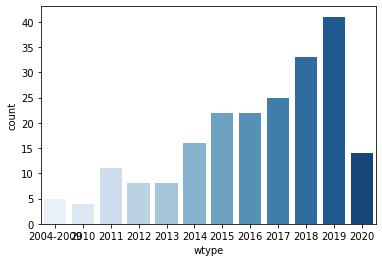

In [8]:
ax = sns.countplot(x="wtype", data=df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

# Parse data from crossref using DOI


In [16]:
cr_df = pd.DataFrame()
for p in range(len(df)): 
    if(df.at[p,'DOI'] !='' or df.at[p,'DOI'] !='nan'):
        try:
            jsdata = cr.works(ids=[df.at[p,'DOI']])
        except:
            print(df.at[p,'DOI'])
            print("Query failed")
            r = dict(df.loc[p])
            cr_df = cr_df.append(r, ignore_index = True)
            continue
        
        if (jsdata['status'] == 'ok'):
            r = dict(df.loc[p])
            r.update(jsdata['message'])
            print(df.at[p,'title'])
            r['citation_count'] =  hb.counts.citation_count(doi =df.at[p,'DOI'])
            cr_df = cr_df.append(r, ignore_index = True)

        
        
    else:
        print(df.loc[p])

Impact of Interaction Context on the Student Affect-Learning Relationship in Child-Robot Interaction
Working with a Social Robot in School: A Long-Term Real-World Unsupervised Deployment
Using Self-Determination Theory in Social Robots to Increase Motivation in L2 Word Learning
Learning Effects of Robots Teaching Based on Cognitive Apprenticeship Theory
The effectiveness of robot training in special education: a robot training model proposal for special education
Robot Interaction Styles for Conversation Practice in Second Language Learning
"The superhero of the university": experience-driven design and field study of the university guidance robot
Enhancing wayfinding in pre-school children through robot and socio-cognitive conflict
Robot Role Design for Implementing Social Facilitation Theory in Musical Instruments Practicing
CoWriting Kazakh: Learning a New Script with a Robot
Design Patterns for an Interactive Storytelling Robot to Support Children's Engagement and Agency
Varied Hum

KeyError: 'fl_count'

In [ ]:
cr_df

In [39]:
cr_df.to_csv('CrossRef_DataFrame.csv', index=False)